In [ ]:
# ! python3 -m pip install -U jupyter matplotlib pandas==1.5.3 scipy scikit-learn
# !python3 -c "import jupyter, matplotlib, numpy, pandas, scipy, sklearn"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
%matplotlib inline

In [2]:
df = pd.read_csv(f'./housing_housing.csv', delimiter=',')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


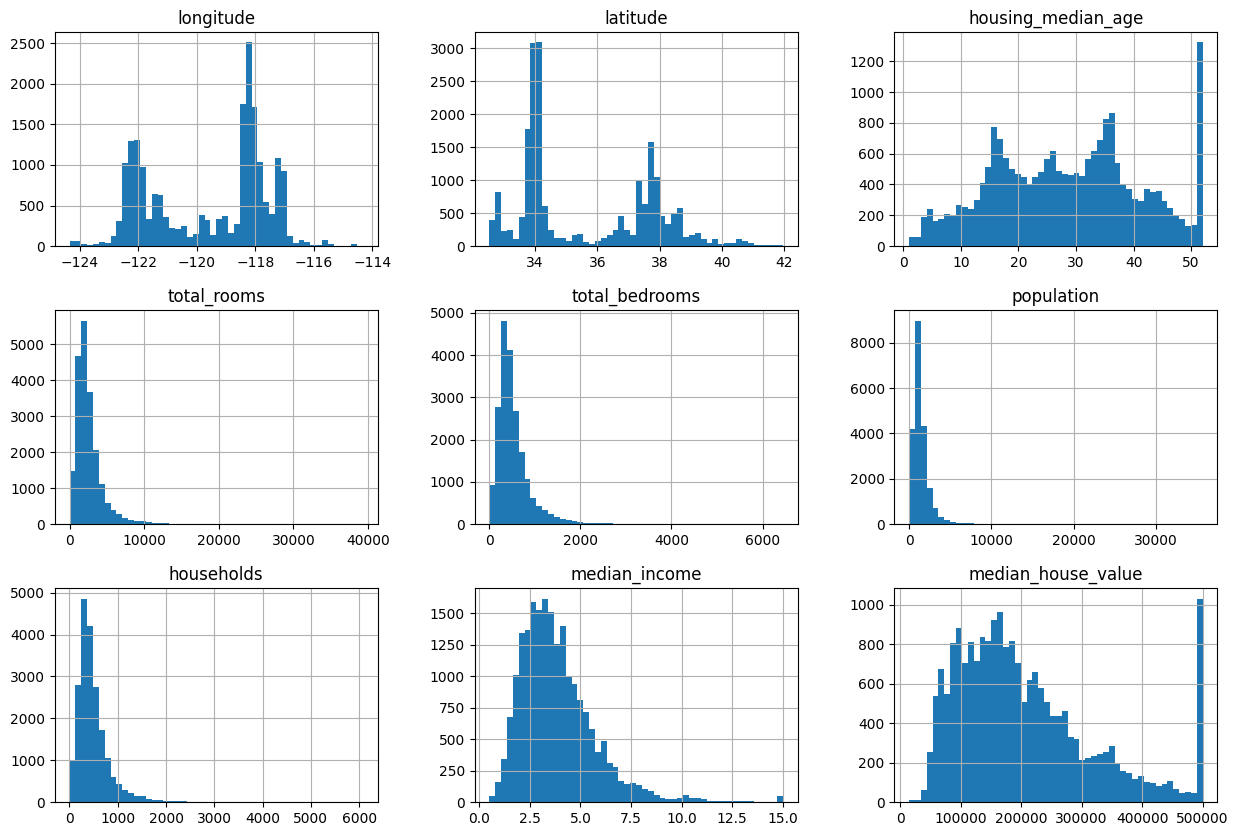

In [ ]:
df.hist(bins=50, figsize=(15,10))
plt.show()

#### Test set

In [ ]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

#### stratified sampling

In [ ]:
df["income_cat"] = pd.cut(df["median_income"],
                          bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                          labels=[1, 2, 3, 4, 5])

<Axes: >

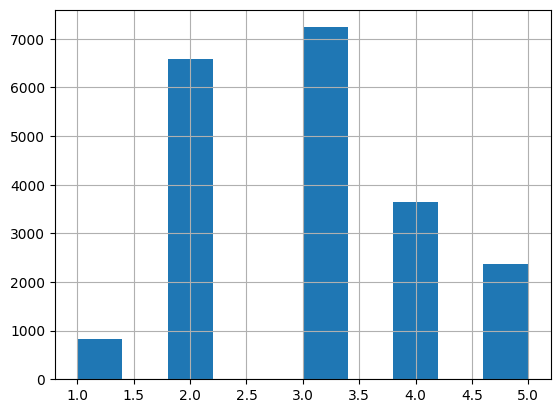

In [ ]:
df.income_cat.hist()

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

In [ ]:
strat_train_set.income_cat.value_counts() / len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [ ]:
strat_test_set.income_cat.value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

Now you should remove the *income_cat* attribute so the data is back to its original state:

In [ ]:
drop_cat = lambda set: set.drop(['income_cat'], axis=1, inplace=True)
drop_cat(strat_train_set)
drop_cat(strat_test_set)

## Next stage: data exploratory analysis

Make a copy of the training data to play with it harmlessly :)

In [ ]:
housing = strat_train_set.copy()

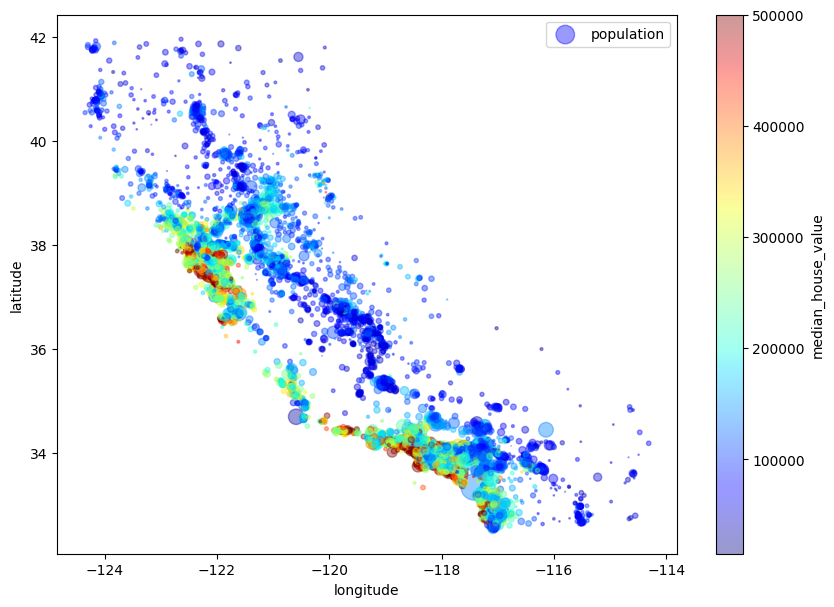

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing.population/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

### Standard correlation coeffcient (also called Pearson’s r)

In [ ]:
corr_matrix = housing.corr()
corr_matrix.median_house_value.sort_values(ascending=False).to_frame()

<ipython-input-10-05a97170e4f8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


,median_house_value
median_house_value,1.000000
median_income,0.687151
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population,-0.026882
longitude,-0.047466
latitude,-0.142673


<Axes: xlabel='median_income', ylabel='median_house_value'>

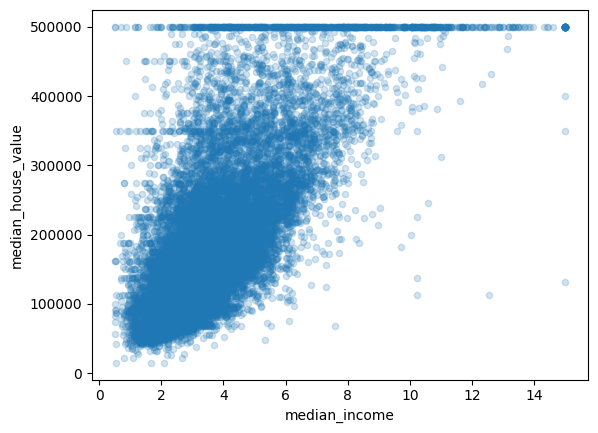

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.2)

### Experimenting with Attribute Combinations

In [ ]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"]=housing["population"] / housing["households"]

In [ ]:
corr_matrix = housing.corr()
corr_matrix.median_house_value.sort_values(ascending=False).to_frame()

<ipython-input-12-05a97170e4f8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


,median_house_value
median_house_value,1.000000
median_income,0.687151
rooms_per_household,0.146255
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population_per_household,-0.021991
population,-0.026882
longitude,-0.047466


In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

# SimpleImputer can only work with numerical values. ocean_proximity it's an object type column.
housing_num = housing.drop("ocean_proximity", axis=1)

# the imputer computed the median for one of each attributes.
imputer.fit(housing_num)

imputer.statistics_ == housing_num.median().values

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
# the imputer replaces the missing values with the mean for each column.
X = imputer.transform(housing_num)

# re-create the dataframe with no missing values
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


### Handling text values

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

In [ ]:
housing_cat = housing[["ocean_proximity"]]

housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
housing_cat_encoded

array([[1.],
       [4.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

### Ordinal Encoder
One issue with this representation is that ML algorithms will assume that two nearby
values are more similar than two distant values. This may be fine in some cases (e.g.,
for ordered categories such as “bad”, “average”, “good”, “excellent”), but it is obviously
not the case for the ocean_proximity column.

A solution to fix this problem is called **one-hot encoding**: 1 (hot) when it's the value and 0 (cold) when it's not.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Custom transformers

The more you
automate these data preparation steps, the more combinations you can automatically
try out, making it much more likely that you will find a great combination (and saving you a lot of time).

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [housing.columns.get_loc(c) for c in col_names] # get the column indices

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [ ]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns) + (["rooms_per_household", "population_per_household"]),
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
  ('imputer', SimpleImputer(strategy="median")),
  ('attribs_adder', CombinedAttributesAdder()),
  ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
  ("num", num_pipeline, num_attribs),
  ("cat", OneHotEncoder(), cat_attribs),
 ])

housing_prepared = full_pipeline.fit_transform(housing)

### Select and Train a Model
We are ready to select and train a Machine Learning model. 🎇

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [ ]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

housing_predictions = lin_reg.predict(some_data_prepared)
# print("Predictions:", lin_reg.predict(some_data_prepared))

In [ ]:
prediction_success_rate = lambda x: x[1]*100 / x[0]

rates = list(zip(housing_predictions, some_labels))
rates_perc = [prediction_success_rate(x) for x in rates]

In [ ]:
print_values = lambda p: print(p)
print_values(rates_perc)

[84.17203595205575, 91.5243096723766, 54.387692133561266, 60.45276397068704, 97.44401460279839]


In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

### The prediction is not that great
Let's try a more powerful model: **the decision tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

##### Wait, what!? No error at all? Seems like the model is overfitting :(
### Better Evaluation Using Cross-Validation
#### Scikit-Learn’s **K-fold cross-validation**

#### Decision Tree

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
tree_rmse_scores

array([71382.170952  , 70481.66368479, 68101.34124337, 71402.91995002,
       70725.30527139, 78079.81450571, 72109.80556622, 72855.03794362,
       69297.29472182, 71003.04272346])

In [ ]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

In [ ]:
display_scores(tree_rmse_scores)

Scores: [71382.170952   70481.66368479 68101.34124337 71402.91995002
 70725.30527139 78079.81450571 72109.80556622 72855.03794362
 69297.29472182 71003.04272346]
Mean: 71543.83965624058
Standard deviation: 2525.726783470804


#### Linear Regression

In [ ]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180634


#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
rand_for_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10)

rand_for_rmse_scores = np.sqrt(-rand_for_scores)
display_scores(rand_for_rmse_scores)

Scores: [51290.91883389 49135.57400837 46669.93671837 52086.88255669
 47420.64912684 51606.4885357  52209.36833658 49550.20647085
 48099.94154051 53874.17524749]
Mean: 50194.41413752893
Standard deviation: 2245.3745886288234


### Fine-tune the model
#### Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63895.161577951665 {'max_features': 2, 'n_estimators': 3}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
52885.86715332332 {'max_features': 2, 'n_estimators': 30}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52754.5632813202 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

### Randomized Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f174d6cad10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f174d6cb7f0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

NameError: ignored

In [ ]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

### Tweaking my model
1. Dropping the (apparently) less useful features of 'ocean_proximity' column.

In [ ]:
housing_cat_t = housing_cat.copy()
housing_cat_t.ocean_proximity = housing_cat_t.ocean_proximity.apply(lambda val: 1 if val == str('INLAND') else 0)
housing_cat_t['INLAND'] = housing_cat_t.ocean_proximity
housing_cat_t = housing_cat_t.drop('ocean_proximity', axis=1)
housing_cat_t.head()

,INLAND
12655,1
15502,0
2908,1
14053,0
20496,0


In [ ]:
housing_num_t = housing_num.copy()
housing_num_t['INLAND'] = housing_cat_t['INLAND']

In [ ]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs_t = attr_adder.transform(housing_num_t.values)
housing_extra_attribs_t = pd.DataFrame(
    housing_extra_attribs_t,
    columns=list(housing_num_t.columns) + (["rooms_per_household", "population_per_household"]),
    index=housing_num_t.index)
housing_extra_attribs_t

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,INLAND,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,1.0,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,0.0,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,1.0,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,0.0,3.886128,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,0.0,6.096552,3.167241
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,0.0,6.658342,2.023976
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,1.0,5.571932,3.363188
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,0.0,4.110465,2.662791
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,0.0,6.297405,2.411178


#### Just the num Pipeline because we dropped the 'ocean_prox; categorical column. So it's no longer needed the full pipeline.

In [ ]:
housing_prepared_t = num_pipeline.fit_transform(housing_num)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared_t, housing_labels)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions_t = lin_reg.predict(housing_prepared_t)
lin_mse = mean_squared_error(housing_labels, housing_predictions_t)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

69422.37851647807

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared_t, housing_labels)
housing_predictions_t = tree_reg.predict(housing_prepared_t)
tree_mse = mean_squared_error(housing_labels, housing_predictions_t)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [ ]:
# cross-validation
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)

scores = cross_val_score(tree_reg, housing_prepared_t, housing_labels,
                         scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

# display_scores(lin_rmse_scores)
display_scores(tree_rmse_scores)

Scores: [77164.57945638 73924.68316737 72210.19929882 73193.90079147
 70735.86276823 76776.41689955 71209.89419354 71954.27231639
 68887.33379428 72393.95786161]
Mean: 72845.1100547637
Standard deviation: 2441.0492068980575


In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared_t, housing_labels)
rand_for_scores = cross_val_score(forest_reg, housing_prepared_t, housing_labels,
                            scoring="neg_mean_squared_error", cv=10)

rand_for_rmse_scores = np.sqrt(-rand_for_scores)
display_scores(rand_for_rmse_scores)

Scores: [53906.62019383 49246.13831127 47263.44354889 52726.23664295
 47773.086774   52839.34878869 54072.61347287 50956.22311369
 49381.84073994 53755.08285437]
Mean: 51192.0634440487
Standard deviation: 2480.832501364231


In [ ]:
# fine-tunning the new model
grid_search.fit(housing_prepared_t, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

66294.05991711987 {'max_features': 2, 'n_estimators': 3}
57848.63467731765 {'max_features': 2, 'n_estimators': 10}
54747.84292879114 {'max_features': 2, 'n_estimators': 30}
61011.82183638609 {'max_features': 4, 'n_estimators': 3}
54487.22577391434 {'max_features': 4, 'n_estimators': 10}
51637.42856506558 {'max_features': 4, 'n_estimators': 30}
62657.05726489878 {'max_features': 6, 'n_estimators': 3}
54489.005829235706 {'max_features': 6, 'n_estimators': 10}
52015.62592378211 {'max_features': 6, 'n_estimators': 30}
61388.456194468985 {'max_features': 8, 'n_estimators': 3}
54362.5196951065 {'max_features': 8, 'n_estimators': 10}
52206.39871769675 {'max_features': 8, 'n_estimators': 30}
64291.7436049328 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
56738.52969230475 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
63223.54506514471 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53995.09494907835 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared_t, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fabe1546b30>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fabe1545090>},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
housing_prepared_t

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [ ]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([0.09741662, 0.0998995 , 0.05404453, 0.01699413, 0.01752763,
       0.01828441, 0.01715394, 0.38755829, 0.05558939, 0.12351853,
       0.11201304])

In [ ]:
housing_prepared_t.shape

(16512, 11)

### Evaluate the final model on the test set

In [ ]:
grid_search.fit(housing_prepared, housing_labels)

final_model = grid_search.best_estimator_

X_test = strat_test_set.drop(['median_house_value'], axis=1)
y_test = strat_test_set.median_house_value.copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47873.26095812988

In [ ]:
from scipy import stats

confidence = 0.95

squared_errors = (final_predictions - y_test) ** 2

np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

The model isn't better that the real state experts but if it will definetly save them some time and effort :)

### Support Vector Machine regressor
How does the best SVR predictor perform?

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


params = {
        'kernel': ['linear', 'rbf'],
        'C': [1, 10, 50, 100],
    }

svr_reg = SVR()
rnd_search = RandomizedSearchCV(svr_reg, param_distributions=params,
                                n_iter=10, cv=10, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=10, estimator=SVR(),
                   param_distributions={'C': [1, 10, 50, 100],
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
final_model = rnd_search.best_estimator_

X_test = strat_test_set.drop(['median_house_value'], axis=1)
y_test = strat_test_set.median_house_value.copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

69499.58221771519

In [ ]:
from scipy import stats

confidence = 0.95

squared_errors = (final_predictions - y_test) ** 2

np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([67011.23772994, 71901.86280463])